In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib



from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
experiments_to_get = [
    "cores_wisig-oracle.run1.framed",
    "cores_wisig-oracle.run2.framed",
    "oracle.run1.framed-cores_wisig",
    "oracle.run2.framed-cores_wisig",
]

experiments = {}

for experiment in experiments_to_get:
    print(experiment)
    experiments[experiment] = get_experiments_from_path(
        os.path.join(get_experiments_base_path(), "tl_2", experiment)
    )

cores_wisig-oracle.run1.framed
cores_wisig-oracle.run2.framed
oracle.run1.framed-cores_wisig
oracle.run2.framed-cores_wisig


In [3]:
all_trials = pd.DataFrame(columns=[
    "experiment_name",
    "source_val_label_accuracy",
    "target_val_label_accuracy",
    "x_transform",
])

pickle_name_mapping = {
    "cores.stratified_ds.2022A.pkl": "cores",
    "metehan.stratified_ds.2022A.pkl": "metehan",
    "oracle.Run1_10kExamples_stratified_ds.2022A.pkl": "oracle.run1",
    "oracle.Run1_framed_2000Examples_stratified_ds.2022A.pkl": "oracle.run1.framed",
    "oracle.Run2_10kExamples_stratified_ds.2022A.pkl": "oracle.run2",
    "oracle.Run2_framed_2000Examples_stratified_ds.2022A.pkl": "oracle.run2.framed",
    "wisig.node3-19.stratified_ds.2022A.pkl": "wisig",
}

x_transform_mapping = {
    tuple(["unit_power"]):"Unit Power",
    tuple(["unit_mag"]): "Unit Magnitude",
    tuple([]): "None"
}

counter = 6

for experiment in experiments_to_get:   
    for trial in experiments[experiment]:
       
        datasets = trial["parameters"]["datasets"]

        transforms = list(set( ( tuple(d["x_transforms"]) for d in datasets) ))

        assert len(transforms) == 1
        
        f = pd.DataFrame(trial["results"])
        f["experiment_name"] = experiment
        f["x_transform"] =  x_transform_mapping[transforms[0]]
        f = f[all_trials.columns]
        
        f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!
        
        
        all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,experiment_name,source_val_label_accuracy,target_val_label_accuracy,x_transform
0,cores_wisig-oracle.run1.framed,0.965753,0.196680,Unit Power
1,cores_wisig-oracle.run1.framed,0.978489,0.313574,None
2,cores_wisig-oracle.run1.framed,0.973780,0.203255,Unit Magnitude
3,cores_wisig-oracle.run2.framed,0.965753,0.205078,Unit Power
4,cores_wisig-oracle.run2.framed,0.978489,0.322852,None
5,cores_wisig-oracle.run2.framed,0.973138,0.207552,Unit Magnitude
6,oracle.run1.framed-cores_wisig,0.839388,0.639876,Unit Power
7,oracle.run1.framed-cores_wisig,0.890332,0.736087,None
8,oracle.run1.framed-cores_wisig,0.789453,0.641374,Unit Magnitude
9,oracle.run2.framed-cores_wisig,0.814095,0.642551,Unit Power


In [4]:
m = pd.melt(all_trials, 
        id_vars=["experiment_name", "x_transform"], 
        value_vars=[
            "source_val_label_accuracy",
            "target_val_label_accuracy",
        ])
m

,experiment_name,x_transform,variable,value
0,cores_wisig-oracle.run1.framed,Unit Power,source_val_label_accuracy,0.965753
1,cores_wisig-oracle.run1.framed,None,source_val_label_accuracy,0.978489
2,cores_wisig-oracle.run1.framed,Unit Magnitude,source_val_label_accuracy,0.973780
3,cores_wisig-oracle.run2.framed,Unit Power,source_val_label_accuracy,0.965753
4,cores_wisig-oracle.run2.framed,None,source_val_label_accuracy,0.978489
5,cores_wisig-oracle.run2.framed,Unit Magnitude,source_val_label_accuracy,0.973138
6,oracle.run1.framed-cores_wisig,Unit Power,source_val_label_accuracy,0.839388
7,oracle.run1.framed-cores_wisig,None,source_val_label_accuracy,0.890332
8,oracle.run1.framed-cores_wisig,Unit Magnitude,source_val_label_accuracy,0.789453
9,oracle.run2.framed-cores_wisig,Unit Power,source_val_label_accuracy,0.814095


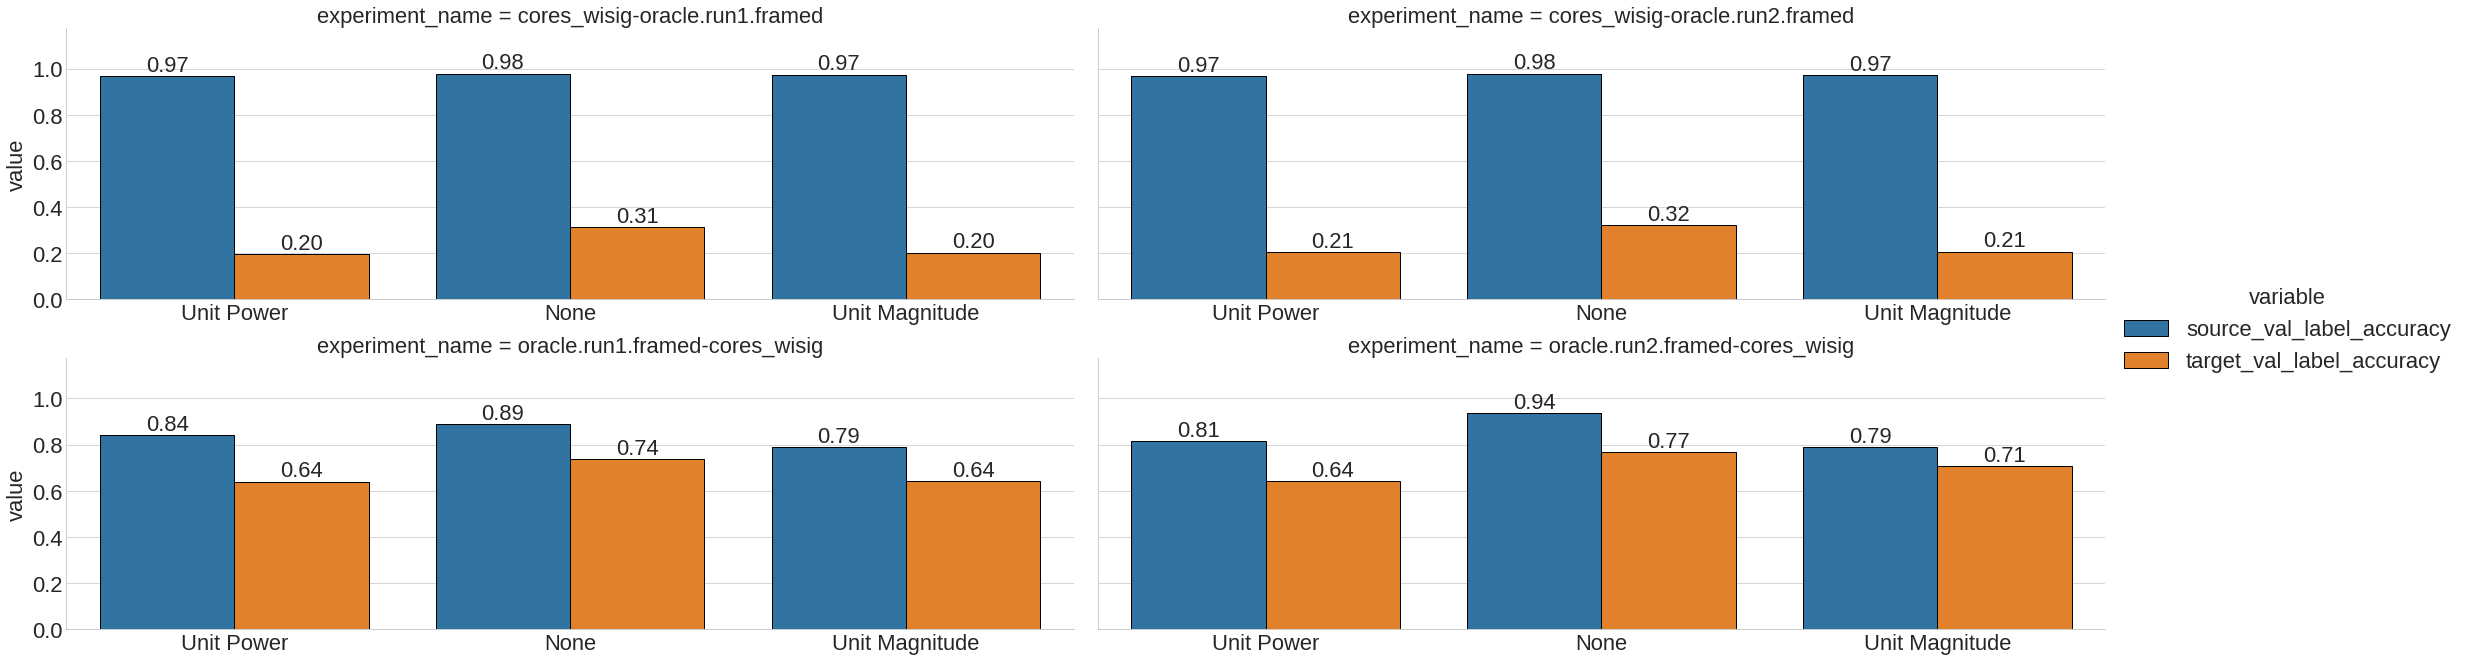

<Figure size 1080x3600 with 0 Axes>

In [6]:
matplotlib.rcParams.update({'font.size': 22})
plt.style.use('seaborn-whitegrid')

fg = sb.catplot(x='x_transform', col="experiment_name", y='value', hue='variable', 
                        data=m, kind='bar', height=5, aspect=3, col_wrap=2, edgecolor = "black")
fg.set_xlabels('')
plt.figure(figsize=(15,50))

# iterate through axes
for ax in fg.axes.ravel():
    
    ax.tick_params(labelbottom=True)
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

